Samieh Baniasadi

400422045


In [19]:
pip install git+https://github.com/jenniferjang/dbscanpp.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jenniferjang/dbscanpp.git to /tmp/pip-req-build-hxz47w2w
  Running command git clone --filter=blob:none --quiet https://github.com/jenniferjang/dbscanpp.git /tmp/pip-req-build-hxz47w2w
  Resolved https://github.com/jenniferjang/dbscanpp.git to commit e47d6d7361d7fb3b2dbe7731bffde5209d7c3011
  Preparing metadata (setup.py) ... done


In [20]:
import os, numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from DBSCANPP import DBSCANPP

In [21]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', sep=r'\s+', header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])
# Points
X= []
for instance in data.values:
    tempL = []
    tempL.append(instance[1])
    tempL.append(instance[6])
    X.append(tempL)
labels_true=data['Label'].values

X = StandardScaler().fit_transform(X)

In [22]:
data

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [23]:
def dbscan(eps, min_samples, X): 
  # Compute DBSCAN
  db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)  
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  return {"n_clusters": n_clusters_, "labels": labels, "core_samples_mask" : core_samples_mask}

In [24]:
# Declare a DBSCAN++, technique can be k-centers and uniform
def dbscanpp(p, eps_density, eps_clustering, minPts, technique, X):
  dbscanpp = DBSCANPP(p=6, eps_density=0.2, eps_clustering=0.4, minPts=10)
  y_hat = dbscanpp.fit_predict(X, init=technique)
  core_samples_mask = np.zeros_like(y_hat, dtype=bool)

  n_clusters_ = len(set(y_hat)) - (1 if -1 in y_hat else 0)
  return {"n_clusters": n_clusters_, "labels": y_hat, "core_samples_mask" : core_samples_mask}

In [25]:
def printout_result(result):
  print('Estimated number of clusters: %d' % result['n_clusters'])
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, result['labels']))
  print("Completeness: %0.3f" % metrics.completeness_score(labels_true, result['labels']))
  print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, result['labels']))
  print("Adjusted Rand Index: %0.3f"
        % metrics.adjusted_rand_score(labels_true, result['labels']))
  print("Adjusted Mutual Information: %0.3f"
        % metrics.adjusted_mutual_info_score(labels_true, result['labels']))
  print("Silhouette Coefficient: %0.3f"
        % metrics.silhouette_score(X, result['labels']))

  # Plot result
  unique_labels = set(result['labels'])
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = (result['labels'] == k)

      xy = X[class_member_mask & result['core_samples_mask']]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=14)

      xy = X[class_member_mask & ~result['core_samples_mask']]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=6)

  plt.title('Estimated number of clusters: %d' % result['n_clusters'])
  plt.show()

Estimated number of clusters: 3
Homogeneity: 0.610
Completeness: 0.503
V-measure: 0.551
Adjusted Rand Index: 0.522
Adjusted Mutual Information: 0.546
Silhouette Coefficient: 0.325


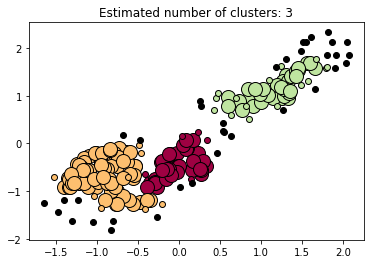

In [26]:
# DBSCAN with epsilon = 0.2, min_samples = 6
result = dbscan(0.2, 6, X)


printout_result(result)

These settings is the best that I found.

Estimated number of clusters: 2
Homogeneity: 0.493
Completeness: 0.673
V-measure: 0.569
Adjusted Rand Index: 0.489
Adjusted Mutual Information: 0.565
Silhouette Coefficient: 0.566


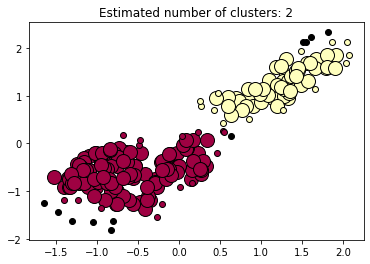

In [27]:
# Change hyper parameters 1
# DBSCAN with epsilon = 0.3, min_samples = 8
result = dbscan(0.3, 8, X)


printout_result(result)

With these settings, algorithm estimated two clusters and it's wrong.

Estimated number of clusters: 4
Homogeneity: 0.486
Completeness: 0.537
V-measure: 0.510
Adjusted Rand Index: 0.449
Adjusted Mutual Information: 0.500
Silhouette Coefficient: 0.239


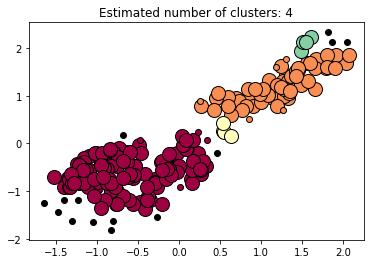

In [28]:
# Change hyper parameters 2
# DBSCAN with epsilon = 0.1, min_samples = 6
result = dbscan(0.2, 3, X)


printout_result(result)

With these settings, algorithm estimated four clusters and it's wrong.

Estimated number of clusters: 2
Homogeneity: 0.449
Completeness: 0.728
V-measure: 0.556
Adjusted Rand Index: 0.476
Adjusted Mutual Information: 0.553
Silhouette Coefficient: 0.407


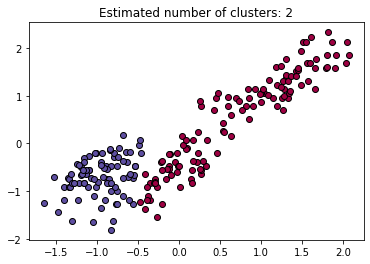

In [29]:
# DBSCANPP with p = 7, eps_density = 0.2, eps_clustering = 0.0285711429, minPts = 10, technique is uniform
result = dbscanpp(7, 0.2, 0.0285711429, 10, "uniform", X)

printout_result(result)

With these settings, algorithm estimated 3 clusters where it's ok and seems results are **better** than the main paper!

Estimated number of clusters: 2
Homogeneity: 0.463
Completeness: 0.783
V-measure: 0.582
Adjusted Rand Index: 0.497
Adjusted Mutual Information: 0.579
Silhouette Coefficient: 0.667


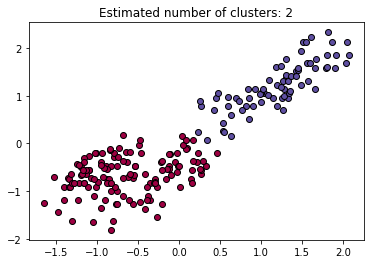

In [30]:
# DBSCANPP with p = 6, eps_density = 0.2, eps_clustering = 0.0285711429, minPts = 10, technique is k-centers that mentioned in papaer
result = dbscanpp(6, 0.2, 0.0285711429, 10, "k-centers", X)

printout_result(result)

With these settings, algorithm estimated two clusters and it's wrong.

Estimated number of clusters: 4
Homogeneity: 0.683
Completeness: 0.581
V-measure: 0.628
Adjusted Rand Index: 0.584
Adjusted Mutual Information: 0.623
Silhouette Coefficient: 0.394


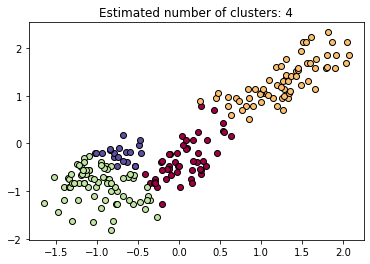

In [31]:
# DBSCANPP with p = 2, eps_density = 0.2, eps_clustering = 0.12, minPts = 10, technique is uniform
result = dbscanpp(2, 0.2, 0.12, 10, "uniform", X)

printout_result(result)

With these settings, algorithm estimated three clusters and it's correct but result is worst in comparition to the first dbscan++ with other settings

Estimated number of clusters: 2
Homogeneity: 0.364
Completeness: 0.587
V-measure: 0.449
Adjusted Rand Index: 0.403
Adjusted Mutual Information: 0.446
Silhouette Coefficient: 0.426


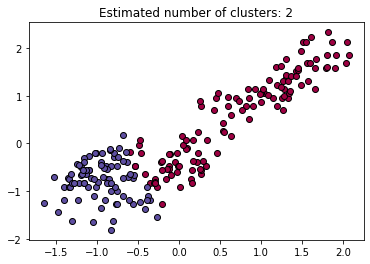

In [32]:
# DBSCANPP with p = 10, eps_density = 0.3, eps_clustering = 0.32, minPts = 10, technique is uniform
result = dbscanpp(10, 0.3, 0.32, 10, "uniform", X)

printout_result(result)

With these settings, algorithm estimated four clusters and it's wrong.